In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cma

# this is just defining the function you want to minimize

<AxesSubplot:>

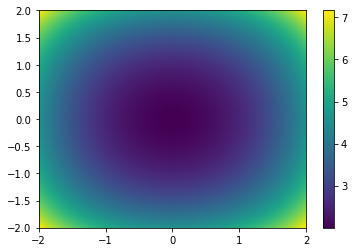

In [2]:
def func_map(cen_x=0,cen_y=0):
    return lambda x,y : np.cos((x-cen_x))+np.cos((y-cen_y))+(x-cen_x)**2+(y-cen_y)**2

def plot_background(X,Y,values):
    fig,ax=plt.subplots()
    im=ax.pcolormesh(X,Y,values,shading='auto')
    plt.colorbar(im)
    return ax

center_func=func_map(-0,0)

xs=np.linspace(-2,2,1000)

X,Y=np.meshgrid(xs,xs)
values=center_func(X,Y)

plot_background(X,Y,values)


# this runs an entire optimization, in the end you want something a little more complicated than this, but it shows how simple it is.

In [3]:
where_to_save_data='C:/Users/torbj/Desktop/project/kwantrl_data/tests/'
opts=cma.CMAOptions(**{'verb_filenameprefix':where_to_save_data})
es = cma.CMAEvolutionStrategy(np.random.uniform(xs[0],xs[-1],2),0.1,opts)

while not es.stop():
    
    proposed_solutions=es.ask() #returns a list of possible solutions
    evaluated_solutions=[center_func(*proposed_solutions[i]) for i in range(len(proposed_solutions))] #evaluate all those possible solutions by your function
    es.tell(proposed_solutions,evaluated_solutions) #tell the evultionary strategy what you measured
    es.logger.add() #adds things to logging
    es.disp()
es.result_pretty()

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=989122, Tue Apr 26 11:53:31 2022)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 5.255858162522426e+00 1.0e+00 1.13e-01  1e-01  1e-01 0:00.0
    2     12 5.076803034002081e+00 1.3e+00 1.55e-01  1e-01  2e-01 0:00.0
    3     18 4.683802792737051e+00 1.8e+00 2.11e-01  2e-01  4e-01 0:00.0
   75    450 2.000000000000004e+00 1.8e+00 2.80e-05  1e-07  1e-07 0:00.0
termination on tolfun=1e-11
final/bestever f-value = 2.000000e+00 2.000000e+00
incumbent solution: [9.444971267017103e-08, -5.326501746385907e-09]
std deviation: [1.0888343976420444e-07, 1.3270664634929853e-07]


CMAEvolutionStrategyResult(xbest=array([-1.57357978e-08, -2.37653276e-08]), fbest=2.0000000000000004, evals_best=430, evaluations=450, iterations=75, xfavorite=array([ 9.44497127e-08, -5.32650175e-09]), stds=array([1.08883440e-07, 1.32706646e-07]), stop={'tolfun': 1e-11})

# here i have made an ilustrative example of how it moves during a search, the class will do single iterations at a time and can plot the suggested solutions

In [4]:
class Slow_cma():
    def __init__(self,):
        opts=cma.CMAOptions(**{'verb_filenameprefix':where_to_save_data})
        self.es = cma.CMAEvolutionStrategy(np.random.uniform(xs[0],xs[-1],2),0.1,opts)
        self.iter_nr=0

    def one_iteration(self,):
        if not self.es.stop():
            proposed_solutions=self.es.ask()
            evaluated_solutions=[center_func(*proposed_solutions[i]) for i in range(len(proposed_solutions))]
            self.es.tell(proposed_solutions,evaluated_solutions)
            self.es.logger.add()
            self.es.disp()
            self.iter_nr+=1
            return np.array(proposed_solutions)
        else:
            self.es.result_pretty()
        

    def plot_iteration(self,proposed_solutions,ax=None):
        ax.scatter(proposed_solutions[:,0],proposed_solutions[:,1],c='r')
        ax.set_title(f'iteration : {self.iter_nr}')
        return ax



# here running 10 iterations at a time and plottting the points

In [5]:
hhh = Slow_cma()

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=1095038, Tue Apr 26 11:53:31 2022)


Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 4.112583105956179e+00 1.0e+00 8.88e-02  8e-02  9e-02 0:00.0
    2     12 4.096571119970240e+00 1.1e+00 1.11e-01  9e-02  1e-01 0:00.0
    3     18 3.786165268178408e+00 1.3e+00 1.39e-01  1e-01  2e-01 0:00.0


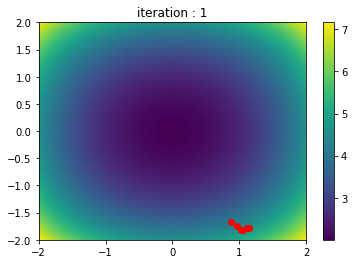

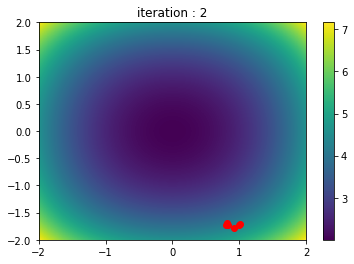

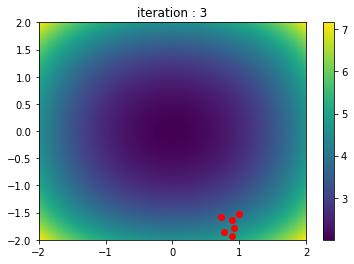

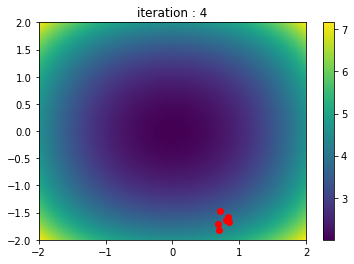

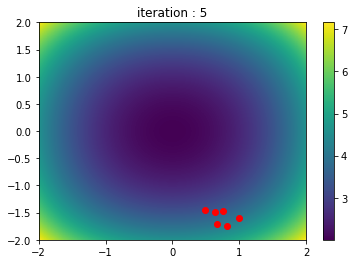

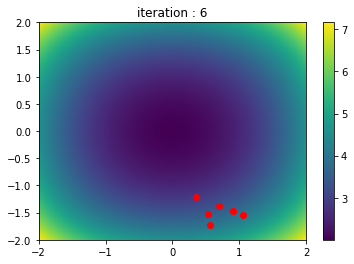

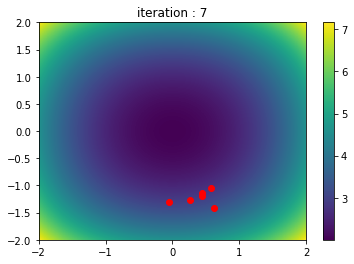

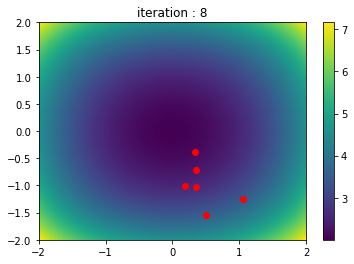

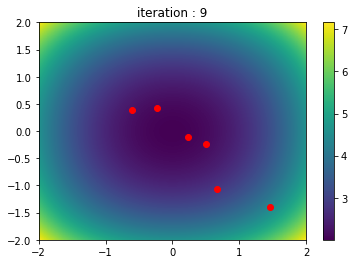

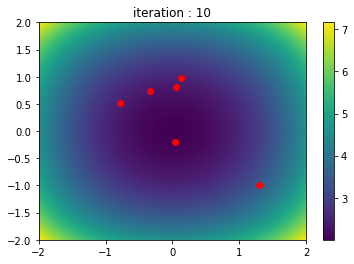

In [6]:
for i in range(10):
    new_background=plot_background(X,Y,values)
    proposed_solutions=hhh.one_iteration()
    ax=hhh.plot_iteration(proposed_solutions,new_background)
    

In [7]:
#https://carstenschelp.github.io/2018/09/14/Plot_Confidence_Ellipse_001.html
#https://gist.github.com/CarstenSchelp/b992645537660bda692f218b562d0712?msclkid=3df28f38c53a11ecb0839d988f5951c6
print(f'C:{hhh.es.C}')
print(f'mean:{hhh.es.mean}')
print(f'eigvals:{np.linalg.eig(hhh.es.C)[0]}')
print(f'eigvecs:{np.linalg.eig(hhh.es.C)[1]}')

C:[[ 0.61331147 -0.48739298]
 [-0.48739298  1.54661916]]
mean:[-0.07035736  0.14656034]
eigvals:[0.40519296 1.75473767]
eigvecs:[[-0.91966632  0.39270074]
 [-0.39270074 -0.91966632]]


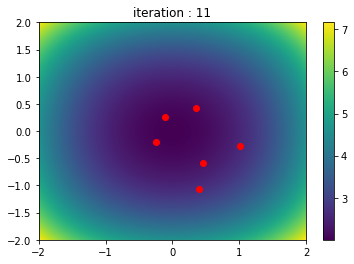

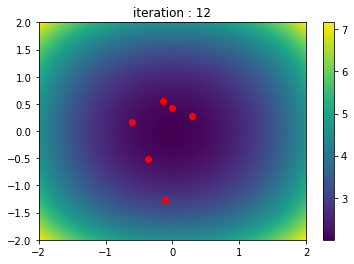

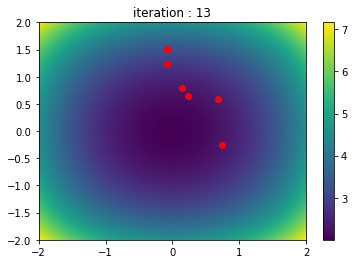

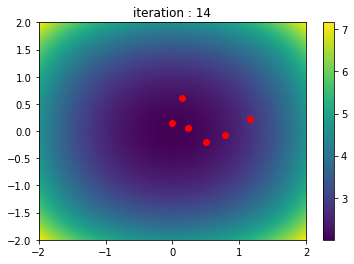

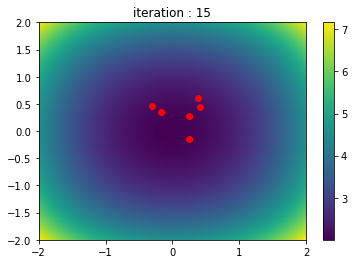

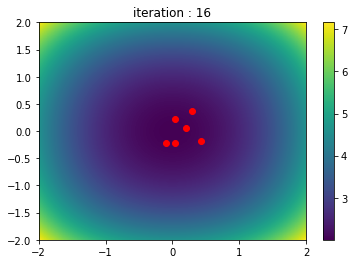

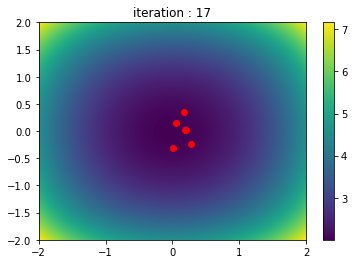

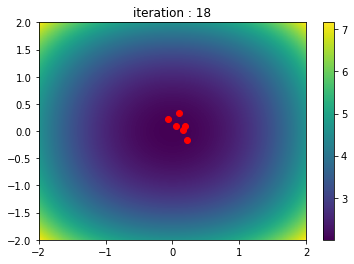

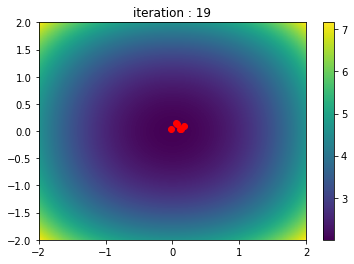

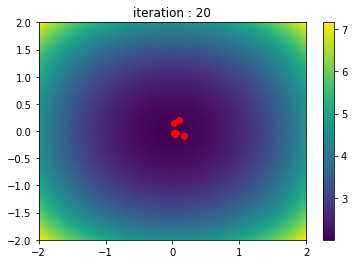

In [8]:
for i in range(10):
    new_background=plot_background(X,Y,values)
    proposed_solutions=hhh.one_iteration()
    ax=hhh.plot_iteration(proposed_solutions,new_background)
    

In [9]:
def new_func(solution):
    val=center_func(solution[0],solution[1])
    return {'val':val}

In [10]:
from kwantrl.optimization.cma import CmaRunner
from kwantrl.datahandling.datahandling import datahandler
dat=datahandler(data_path='C:/Users/torbj/Desktop/project/kwantrl_data')
runner=CmaRunner(new_func,np.random.uniform(xs[0],xs[-1],2),sigma0=0.5,datahandler=dat)

data saved to:C:/Users/torbj/Desktop/project/kwantrl_data/outcmaes/21/
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=1086361, Tue Apr 26 11:53:42 2022)


In [11]:
runner.optimize()

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 4.242420238495115e+00 1.0e+00 4.77e-01  5e-01  5e-01 0:00.0
    2     12 2.768282925211714e+00 1.1e+00 6.38e-01  6e-01  8e-01 0:00.0
    3     18 2.185826454381895e+00 1.3e+00 1.02e+00  1e+00  1e+00 0:00.0
   84    504 2.000000000000000e+00 1.3e+00 1.55e-05  1e-08  1e-08 0:00.1
termination on tolfun=1e-11
termination on tolfunhist=1e-12
final/bestever f-value = 2.000000e+00 2.000000e+00
incumbent solution: [-4.949711202194583e-09, -2.0678194895354525e-09]
std deviation: [1.3042964917295187e-08, 1.1776015904002274e-08]
